## Monte Carlo 
Calculo de integrales y metodo de muestreo por importancia para reduccion de varianza

Cargamos las paqueterías que usaremos en la sesión

In [3]:
using Distributions, LinearAlgebra, Plots

Supongamos que queremos calcular
$$
\int_{0}^{\pi} \sin{x}
$$
Analíticamente lo podemos hacer y sabemos que la integral anterior es:
$$
\int_{0}^{\pi} \sin{x} = 2
$$

Sin embargo también lo podemos hacer con el método Monte Carlo, simuladondo varables aleatrias uniforme en nuestro intervalo de integración $(a,b)$ y calculando la esperanza de nuestra funcion $\sin(x)$ en función de nuestra pdf de la uniforme en $(a,b)$ que por estadística sabemos que la media muestral será una excelente aproximacion al primer momento de nuestra variable aleatoria

In [4]:
muestra = rand(Uniform(0,pi),1000)
Integral = mean(sin.(muestra) .* pi)

2.0001715371868554

Como vemos ha funcionado y nos ha arrojado un resultado muy bueno, repitamos el experimento varias veces mas y veamos su histograma

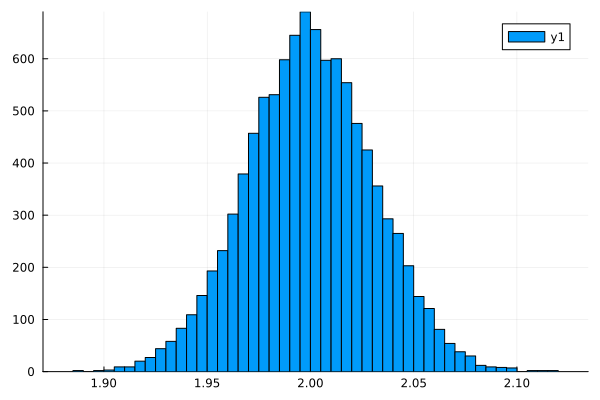

In [5]:
m = 10000
Integral = zeros(m)
for i in 1:m
    muestra = rand(Uniform(0,pi),1000)
    Integral[i] = mean(sin.(muestra) .* pi)
end

histogram(Integral)

Notemos que su distribución se asemeja a la de una normal, por lo que nuestro próximo objetivo ahora es reducir la varianza de nuestros resultados para hacer mas eficientes nuestras simulaciones y mas precisas

Muestreo por importancia

Definamos la siguiente función indicadora que nos será útil

In [6]:
function indicadora(x)
    if x >= 2
        return 1
    else
        return 0
    end
end

indicadora (generic function with 2 methods)

Si tratamos de obtener el mismo resultado, pero ahora simulando variables aleatorias $X \sim Cauchy(0,1)$ para evaluar la siguiente integral:

$$
\int_{2}^{\infty} \dfrac{1}{\pi(1+x^2)} dx = 0.127584...
$$

In [7]:
n = 1000
m = 1000000
estimador = zeros(m)

for i in 1:m
    Y = rand(Cauchy(),n)
    estimador[i] = mean(indicadora.(Y))
end

Veamos que tenemos una aproximacón decente

In [8]:
mean(estimador)

0.14757663199999999

Sin embargo podemos apreciar que la varianza es relativamente grande

In [9]:
var(estimador)

0.0001259035994401754

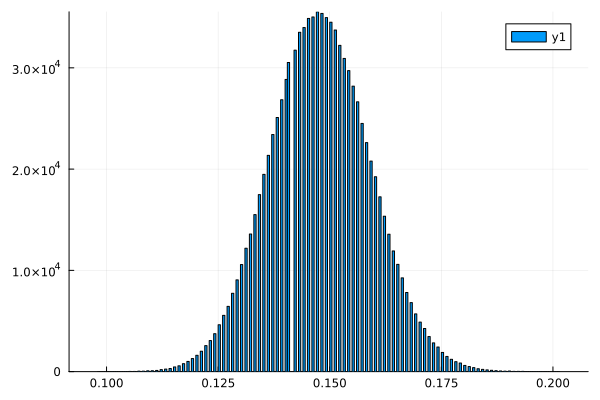

In [10]:
histogram(estimador)

Así las cosas podemos utilizar una función de muestreo por importancia que nos permita reducir la varianza de una excelente manera

In [11]:
n = 1000
m = 1000000
estimador2 = zeros(m)
for i in 1:m
    U = rand(Uniform(0,1),n)
    X = 2 ./(1 .- U)
    estimador2[i] = (1 ./ n) .* sum((X .^ 2) ./ (2 .* pi .* (X.^2 .+ 1)))
end


Como vemos en promedio las estimaciones son mucho mejores que el anterior caso

In [12]:
mean(estimador2)

0.1475836705097217

La varianza se ha reducido enormemente con respecto al caso anterior y este metodo ha resultado excelente para obtener mejores aproximaciones

In [13]:
var(estimador2)

9.544561822877178e-8

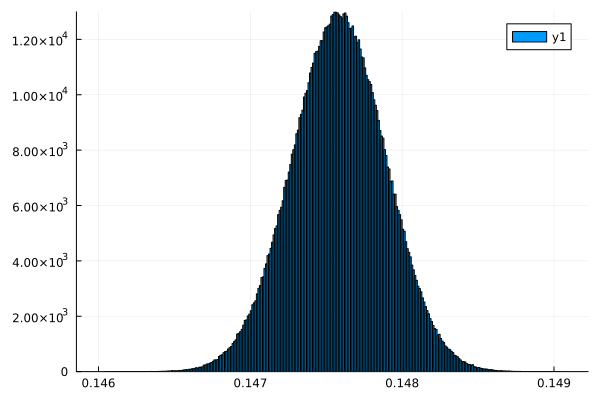

In [14]:
histogram(estimador2)

Por ultimo comparemos en cuantas veces la varianza se ha visto reducida

In [15]:
var(estimador)/var(estimador2)

1319.1134572401163

La varianza se ha reducido 1316 veces, por lo que este método funciona perfectamente para la reduccion de varianza

## Simulacion Monte Carlo de un funcion de densidad Normal(0,1)

In [16]:
function indicadora(X,x,h)
    if X>x && X<x+h
        return 1
    else
        return 0
    end
end

indicadora (generic function with 2 methods)

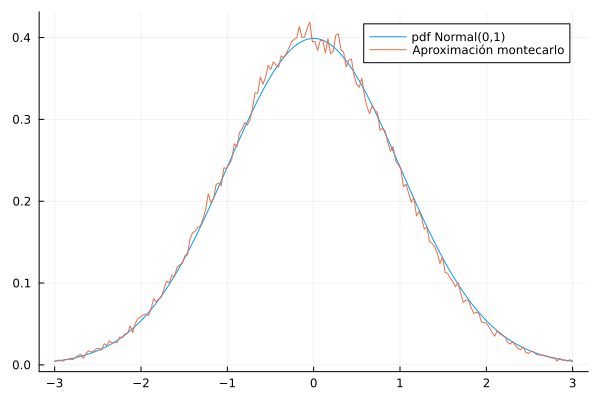

In [17]:
n = 1000
m = 100

L = LinRange(-3,3,200)
aproximacion = zeros(length(L))

for k in 1:length(L)
    X = [rand(Normal(),n) for i in 1:m]
    x = [L[k] for i in 1:n]
    h = [0.05 for i in 1:n]

    A_i = zeros(m)
    for i in 1:m
        A_i[i] = mean(indicadora.(X[i],x,h)./h)
    end
    A = mean(A_i)
    aproximacion[k] = A
end

plot(L,[pdf(Normal(),i) for i in L], label = "pdf Normal(0,1)")
plot!(L,aproximacion, label="Aproximación montecarlo")